# 1. Decaying simulation: suppose the probability of decaying are p = λ∆t and p = λ∆t/t. For both of them, write down programs that simulate these phenomena

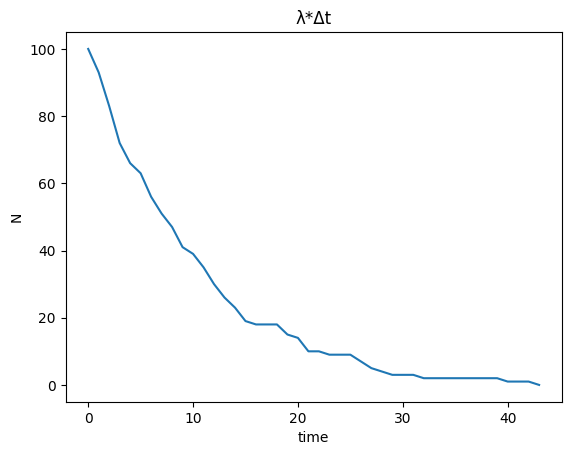

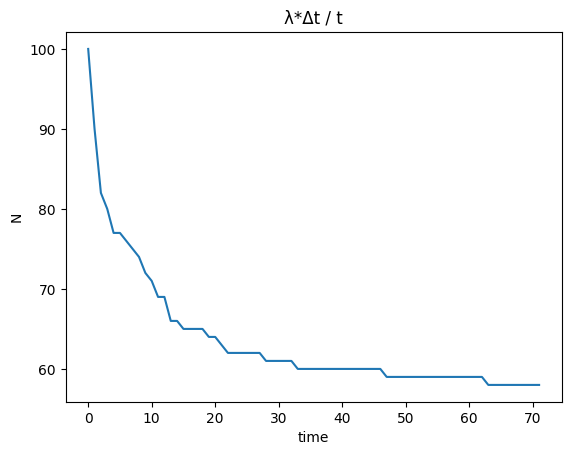

In [3]:
import random
import matplotlib.pyplot as plt

def decay1(landa, N, delta_t=1):
  '''
  p = λ*Δt
  '''
  ys=[N]
  ts=[0]
  s=0
  while ys[-1]>0:
    dn=0
    s+=1
    for i in range(ys[-1]):
        if random.random() < landa * delta_t:
          dn+=1

    ys.append(ys[-1]-dn)
    ts.append(s* delta_t)

  return ts,ys


def decay2(landa, N, delta_t=1):
  '''
  p = λ*Δt / t
  '''
  ys=[N]
  ts=[0]
  s=0
  # while ys[-1]>0:
  while s<=70: #it last forever bc landa * delta_t/s is verrrry small
    dn=0
    s+=1
    for i in range(ys[-1]):
        if random.random() < landa * delta_t/s:
          dn+=1

    ys.append(ys[-1]-dn)
    ts.append(s* delta_t)

  return ts,ys

landa= 0.1
N= 100
ts,ys= decay1(landa, N, delta_t=1)
plt.plot(ts,ys)
plt.xlabel('time')
plt.ylabel('N')
plt.title('λ*Δt')
plt.show()

ts,ys= decay2(landa, N, delta_t=1)
plt.plot(ts,ys)
plt.xlabel('time')
plt.ylabel('N')
plt.title('λ*Δt / t')
plt.show()


# 2. Using Stone throwing method, compute the value of pi (π). Check your algorithm for various values of sampling, N.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

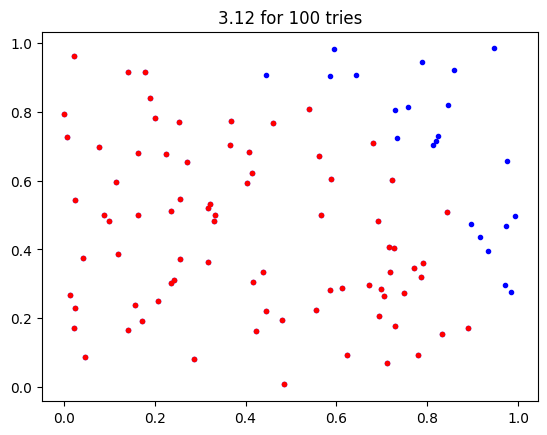

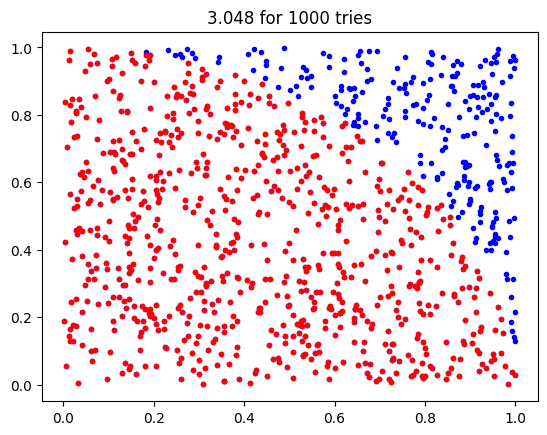

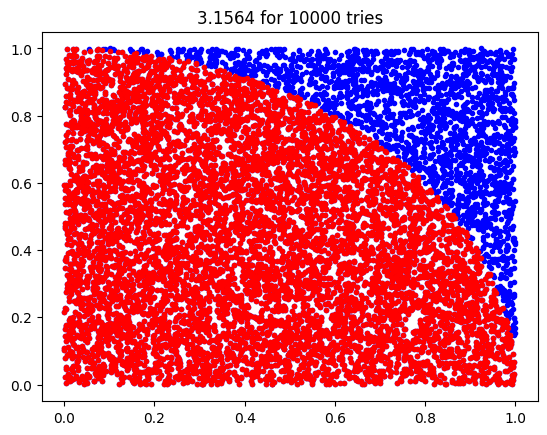

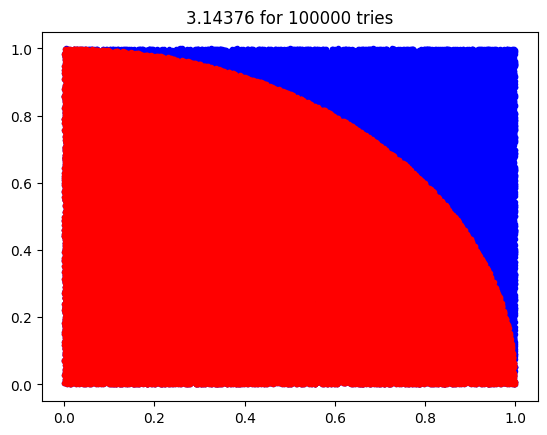

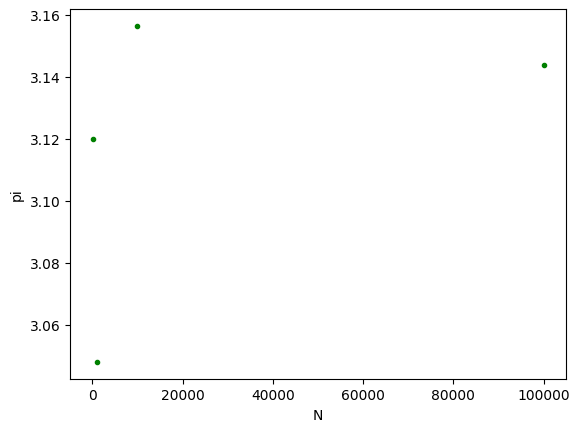

In [27]:
def pi(N):
  x= np.random.rand(N)
  y= np.random.rand(N)
  mask= x**2+y**2<=1

  n_n0= np.sum(mask)/N
  p= 4* n_n0

  return p,x,y,mask

ps=[]
for N in [10**i for i in range(2,6)]:
  p,x,y,mask = pi(N)
  plt.plot(x,y,'.b')
  plt.plot(x[mask],y[mask],'.r')
  plt.title(f'{p} for {N} tries')
  plt.show()
  ps.append(p)

plt.plot([10**i for i in range(2,6)],ps,'.g')
plt.xlabel('N')
plt.ylabel('pi')
plt.show()

# 3

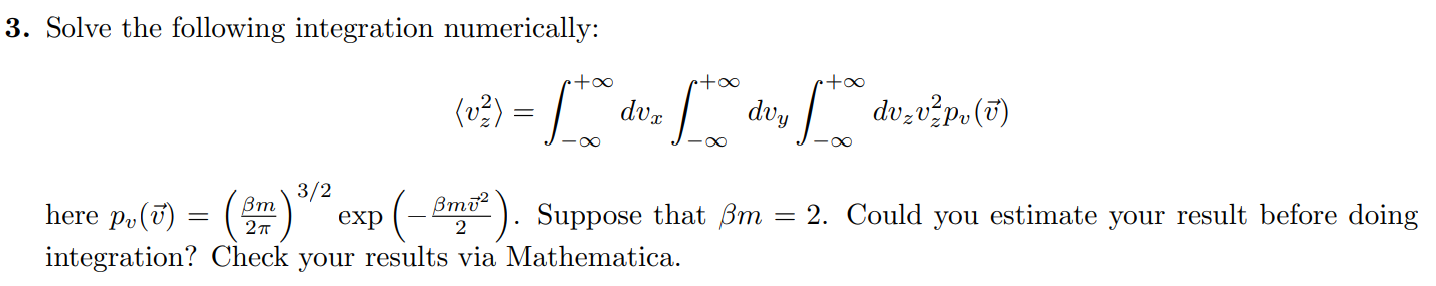

The numerical value of integral is qual to 0.4885590640531272 but the exact solution is .5


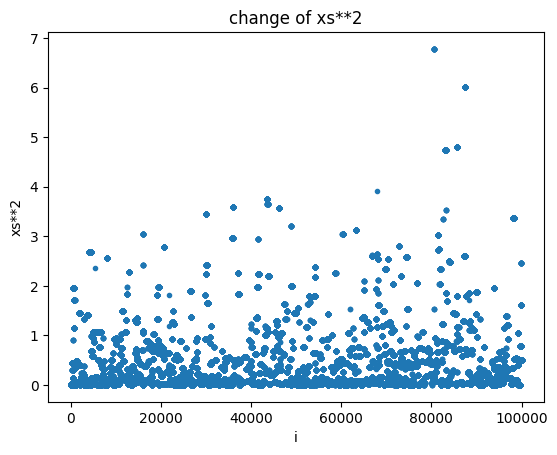

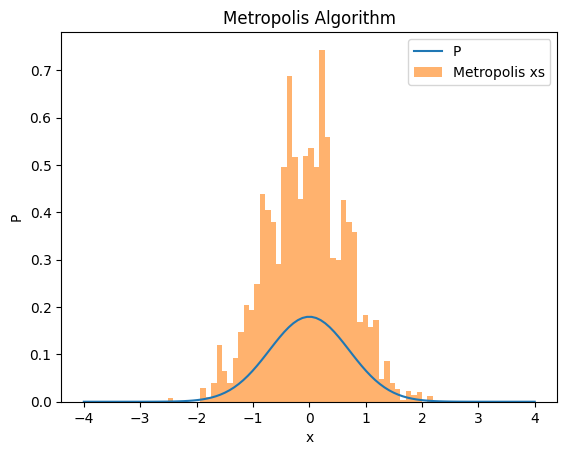

In [45]:
import numpy as np
import matplotlib.pyplot as plt


def p(x):
    return np.exp(-x**2)/np.sqrt(np.pi)**3

def metropolis(p, N):
    xs = []
    x_old = 0

    for _ in range(N):

        x_new = x_old + np.random.normal(x_old, 100)
        #it should be np.random.normal(0, 10000) but i think it orks better this way
        # bc it stays close to ones whom are more probable!

        acceptance_ratio = min(1, p(x_new) / p(x_old))

        if np.random.rand() < acceptance_ratio:
            x_old = x_new

        xs.append(x_old)

    return np.array(xs)

N=100000
xs = metropolis(p, N)

print(f'The numerical value of integral is qual to {np.mean(xs**2)} but the exact solution is .5')
plt.plot(xs**2,'.')
plt.xlabel('i')
plt.ylabel('xs**2')
plt.title('change of xs**2')
plt.show()


x = np.linspace(-4, 4, 100)
plt.plot(x, p(x) , label='P')

plt.hist(xs, bins=50, density=True, alpha=0.6, label='Metropolis xs')

plt.legend()
plt.xlabel('x')
plt.ylabel('P')
plt.title('Metropolis Algorithm')
plt.show()

# if we have equipartition E=3NkT= 3 1/(beta*m)= now is = 3/2 and so <p^2>= 1/2


In [ ]:
#xs